# 1. Analyse Factorielle des Correspondances (AFC)

## Objectif :

 Étudier les relations qualitatives entre les types d’énergies utilisées (renouvelables vs non-renouvelables) et les classifications des pays (revenu faible, intermédiaire, élevé).

## Questions que l'on se pose  :

1. Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

2. Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

In [1]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

### Données d'entrée et Construction du tableau de contingence

In [7]:
# Chargement des données depuis le fichier CSV 
data = pd.read_csv('transition_energetique_pays_2023.csv') 
# Création du tableau de contingence 
contingency_table = pd.crosstab(data['Revenu'], data['Classification Transition Énergétique'])

display(contingency_table)


Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


### Modèle d'indépendance et Calcul des écarts

Calcul du modèle d'indépendance, en déterminant les écarts entre les valeurs observées et les valeurs attendues (Matrices T0 et R)

In [3]:
# Calcul du modèle d'indépendance
total = contingency_table.values.sum()
row_totals = contingency_table.sum(axis=1).values
col_totals = contingency_table.sum(axis=0).values
expected = np.outer(row_totals, col_totals) / total

# Calcul des écarts
residuals = contingency_table.values - expected
print("Modèle d'indépendance attendu :")
print(expected)
print ('-------------------------')
print("Écarts à l'indépendance :")
residuals


Modèle d'indépendance attendu :
[[25.10526316 57.78195489 23.11278195]
 [ 5.44736842 12.53759398  5.01503759]
 [15.63157895 35.97744361 14.39097744]
 [16.81578947 38.70300752 15.48120301]]
-------------------------
Écarts à l'indépendance :


array([[-20.10526316,  25.21804511,  -5.11278195],
       [ 14.55263158, -10.53759398,  -4.01503759],
       [ 19.36842105, -24.97744361,   5.60902256],
       [-13.81578947,  10.29699248,   3.51879699]])

### Décomposition en facteurs principaux

Application de la décomposition en valeurs singulières (SVD) pour obtenir les axes principaux de l'AFC.

In [4]:

from sklearn.decomposition import TruncatedSVD

# Application de SVD pour obtenir les axes principaux
svd = TruncatedSVD(n_components=2)
transformed_data = svd.fit_transform(residuals)

transformed_data

array([[ 32.51732626,  -2.98922032],
       [-17.15332397,  -6.68610324],
       [-31.89116533,   3.66375913],
       [ 16.52716304,   6.01156444]])

### Interprétation des résultats

Visualisation des axes principaux obtenus à partir des valeurs propres et des vecteurs propres.

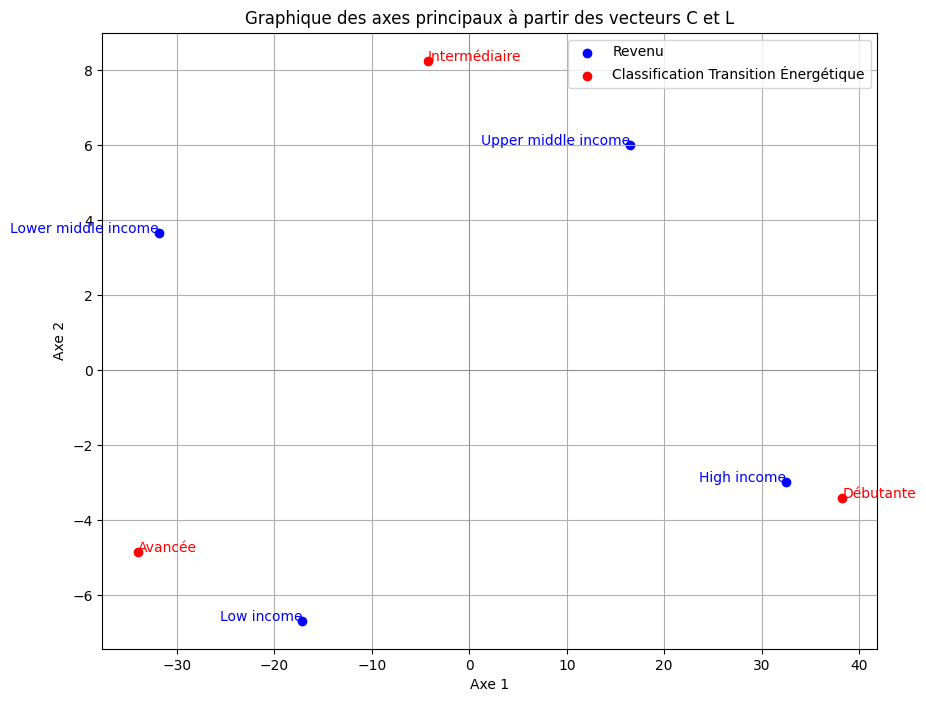

In [5]:
L = svd.fit_transform(residuals) # Coordonnées des lignes (types de revenu)
C = svd.components_.T * svd.singular_values_ # Coordonnées des colonnes (classification transition énergétique) 

# Noms des modalités pour chaque catégorie
revenu_labels = list(contingency_table.index)
transition_labels = list(contingency_table.columns) 

# Tracé du graphique 
plt.figure(figsize=(10, 8)) 

# Affichage des points pour les types de revenu (L) 
plt.scatter(L[:, 0], L[:, 1], color='blue', label='Revenu') 
for i, label in enumerate(revenu_labels): 
    plt.annotate(label, (L[i, 0], L[i, 1]), color='blue', ha='right') 

    # Affichage des points pour les classifications de transition énergétique (C) 
plt.scatter(C[:, 0], C[:, 1], color='red', label='Classification Transition Énergétique')
for i, label in enumerate(transition_labels): 
    plt.annotate(label, (C[i, 0], C[i, 1]), color='red', ha='left') 

# Ajustements du graphique 
plt.title("Graphique des axes principaux à partir des vecteurs C et L")
plt.xlabel("Axe 1") 
plt.ylabel("Axe 2")
plt.axhline(0, color='gray', lw=0.5) 
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Interprétation :

Les produits scalaires entre les coordonnées des modalités révèlent les associations fortes, faibles ou neutres entre les différents niveaux de revenu et les classifications de transition énergétique.

        + Association Positive (Produit Scalaire Positif) : 
    "High Income" & "Débutante" : Une association positive indique qu'il existe une tendance pour certains pays à haut revenu à être dans une phase débutante de la transition énergétique, malgré leurs ressources.

    "Upper Middle Income" & "Intermédiaire" : Ces pays montrent une transition énergétique en cours.

    "Lower Middle Income" & "Avancée" et "Lower Middle Income" & "Intermédiare" :  Ces pays montrent une transition énergétique soit en cours soit avancée.

    "Low Income" & "Avancée" : Les pays à faible revenu sont plus avancés dans la transition énergétique en général.

        + Association Négative (Produit Scalaire Négatif) :
     "Low Income" & "Intermédiare" : Une association négative suggère que les pays à faible revenu sont moins représentés dans la catégorie de transition énergétique intermédiaire.

    "Lower Middle Income" & "Débutante" : Indique que les pays à revenu intermédiaire inférieur sont moins susceptibles d'être en phase débutante de la transition énergétique.
    
    "High Income" & "Avancée" et "High Income" & "Intermédiare" :Les pays à haut revenu montrent une petite susceptibilité d'être classifiés en tant qu' avancés ou intermédiaires dans la transition énergétique.

        + Association Neutre (Produit Scalaire Nul) :
    "Low Income" & "Débutante" : on retrouve une relation neutre entre les pays à revenu faible et une phase débutante de la transition énergitique malgré le manque de ressources.
    
    "Upper Middle Income" et "Débutante" : on observe une relation neutre entre ces pays et une phase débutante de la transition énergitique .

## Axes Factoriels, Profils Lignes/Colonnes et Qualité de Représentation (Cos2)

On re visualise le tableau de contingence

In [8]:
display(contingency_table)

Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


In [9]:
# On crée une instance de la classe CA (Analyse des Correspondances)
afc = CA(
    row_labels=contingency_table.index.values,  
    col_labels=contingency_table.columns.values, 
    stats=True  
)

# Ajuster le modèle AFC en utilisant les valeurs du DataFrame
afc.fit(contingency_table.values)

CA(col_labels=array(['Avancée', 'Débutante', 'Intermédiaire'], dtype=object),
   row_labels=array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object))

### Aides à l'interprétation
#### Choix des axes factorielles

In [10]:
# Accéder aux valeurs propres (Eigenvalues) du modèle d'Analyse des Correspondances (AFC)
print(afc.eig_)

[[4.82072081e-01 3.52295735e-02]
 [9.31897427e+01 6.81025727e+00]
 [9.31897427e+01 1.00000000e+02]]


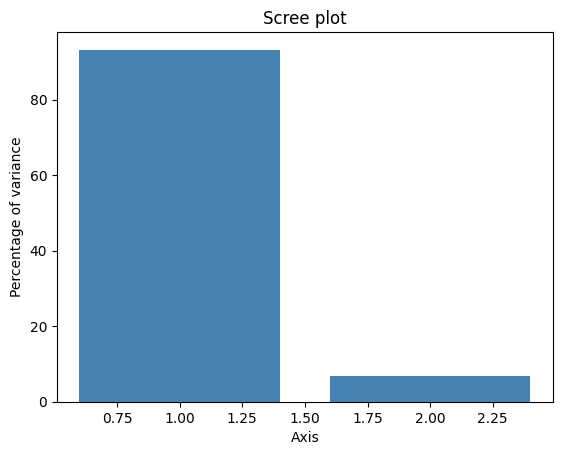

In [11]:
# Visualiser les valeurs propres sous forme de pourcentage de variance expliquée par chaque dimension
afc.plot_eigenvalues(type="percentage")

#### Interptétation
Le premier axe (Axis 1) explique environ 90% de la variance totale des données. Cela signifie que ce premier axe capture une grande partie des relations importantes entre les pays et leur classification de transition énergétique.

Le deuxième axe (Axis 2) explique environ 8% de la variance. Il ajoute des informations supplémentaires mais de manière moins significative que le premier axe.

Ensemble, les deux premières dimensions expliquent environ 98% de la variance totale, ce qui signifie que presque toutes les relations importantes et les variations dans les données sont capturées par ces deux axes.

#### Analyse des qualités de représentation (cos2)

##### 1. Analyse suivant le profil ligne (Revenu)

Premier axe factoriel


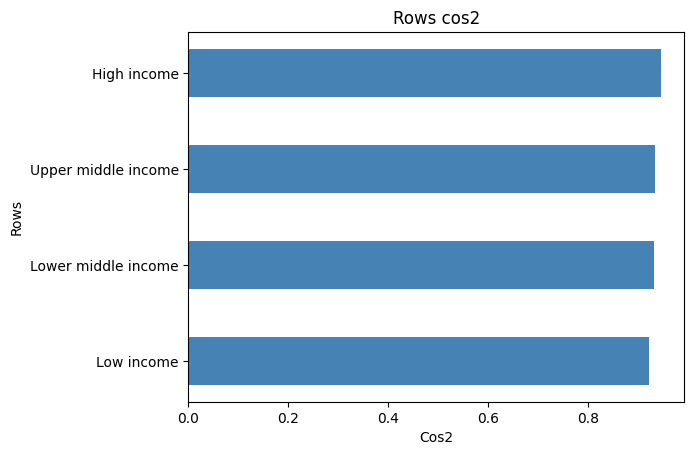

In [12]:
# Afficher la qualité de représentation des lignes (Revenu) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_row_cos2(num_axis=1)

##### Interprétation :
Les valeurs élevées de Cos2 pour toutes les catégories de revenu montrent que le premier axe factoriel capture efficacement les principales relations et variations dans les données de transition énergétique. Cela signifie que les caractéristiques liées à la transition énergétique des pays, qu'ils soient à revenu élevé, intermédiaire supérieur, intermédiaire inférieur ou faible, sont bien expliquées par le premier axe. En d'autres termes, il existe une forte association entre les catégories de revenus des pays et leurs profils de transition énergétique.

Second axe factoriel


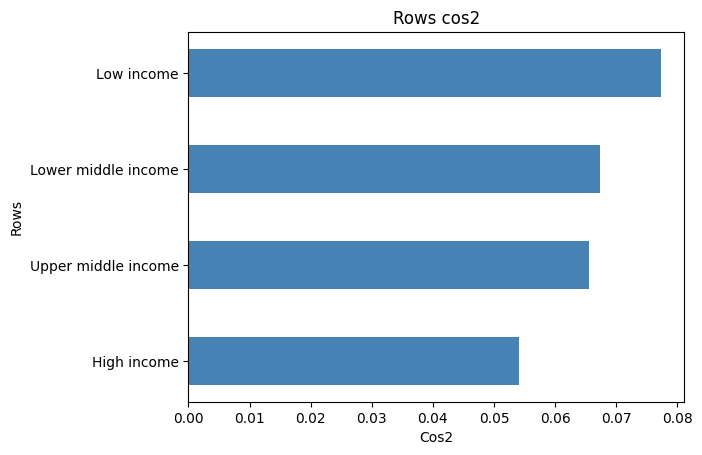

In [13]:
# Afficher la qualité de représentation des lignes (Revenu) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_row_cos2(num_axis=2)

#### Interptétation
    Les valeurs de Cos2 pour le second axe sont très faibles (0.075, 0.067, 0.065 et 0.055), donc les caractéristiques liées aux revenus sont mal expliquées mais elles apportent des nuances supplémentaires et complètent l'analyse du premier axe. Parmi ces faibles valeurs, les pays à revenu faible sont les mieux représentés, tandis que les pays à revenu élevé sont les moins bien représentés par le second axe.

##### 2. Analyse suivant le profil colonne (Classification Transition Énergétique)

Premier axe factoriel


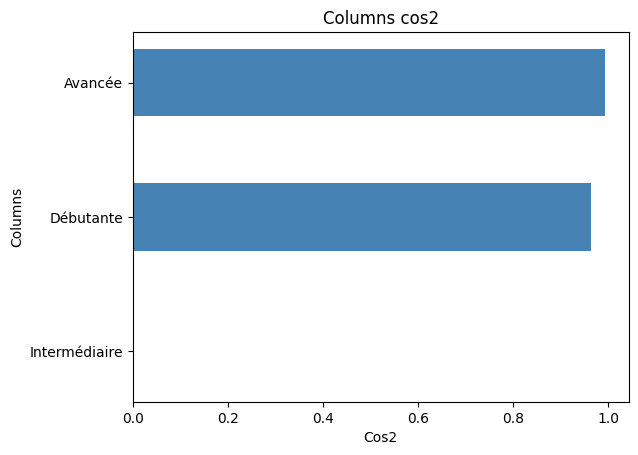

In [14]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_col_cos2(num_axis=1)

#### Interptétation
    + Avancée :
Cos2 proche de 1 : Cette valeur indique une qualité de représentation quasi parfaite par le premier axe. Cela signifie que cette classification est très bien expliquée par ce premier axe.
    Interprétation : Les pays ayant des politiques énergétiques avancées sont fortement associés aux caractéristiques principales capturées par le premier axe, ce qui suggère qu'ils suivent des tendances similaires en termes de transition énergétique.

    + Débutante :
Cos2 proche de 1 : Cette valeur montre également une qualité de représentation très élevée par le premier axe.
    Interprétation : Les pays avec des politiques énergétiques débutantes montrent des caractéristiques similaires bien capturées par le premier axe, indiquant que ce premier axe représente efficacement leurs profils de transition énergétique.

    + Intermédiaire :
Cos2 proche de 0 : Cela signifie que cette classification de transition énergétique est mal représentée par le premier axe.
    Interprétation : Les pays ayant des politiques énergétiques intermédiaires ne suivent pas les mêmes tendances principales capturées par le premier axe. Leurs variations ne sont pas bien expliquées par cette dimension, suggérant que d'autres axes sont nécessaires pour mieux comprendre leurs profils de transition énergétique.

Second axe factoriel


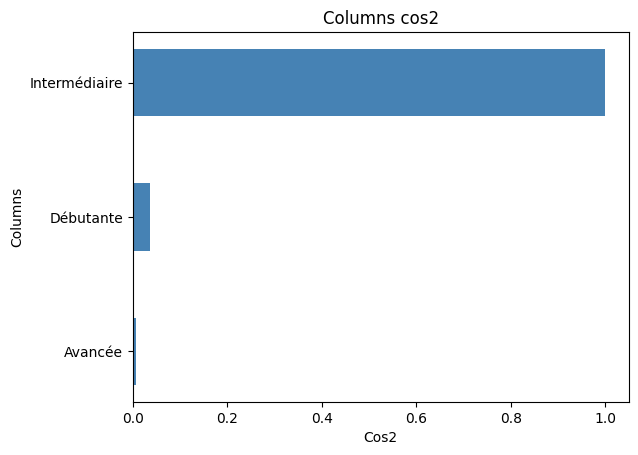

In [15]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_col_cos2(num_axis=2)

#### Interprétation
    + Intermédiaire :
    Cos2 de 0,98 : Cette valeur est très élevée contrairement à celle du premier axe, ce qui signifie que cette classification de transition énergétique est extrêmement bien représentée par le second axe.
     Cette valeur indique que des aspects importants de leur transition énergétique ne sont pas totalement expliqués par le premier axe et nécessitent le second axe pour être pleinement compris.

    + Débutante :
    Cos2 de 0,05 : Bien que cette valeur soit la deuxième plus élevée parmi les classifications de transition énergétique, elle est très faible et donc est faiblement représentées par le second axe.
    
    + Avancée :
    Cos2 de 0,01 : Cette valeur est la plus faible parmi toutes les classifications de transition énergétique, pratiquement égale à 0.
     Les pays ayant des politiques énergétiques avancées ne présentent pas des variations significatives capturées par le second axe, ce qui suggère que les principaux facteurs de leur transition énergétique sont déjà bien expliqués par le premier axe.

#### Analyse des contributions

##### Profils lignes (Revenu) 

Premier axe


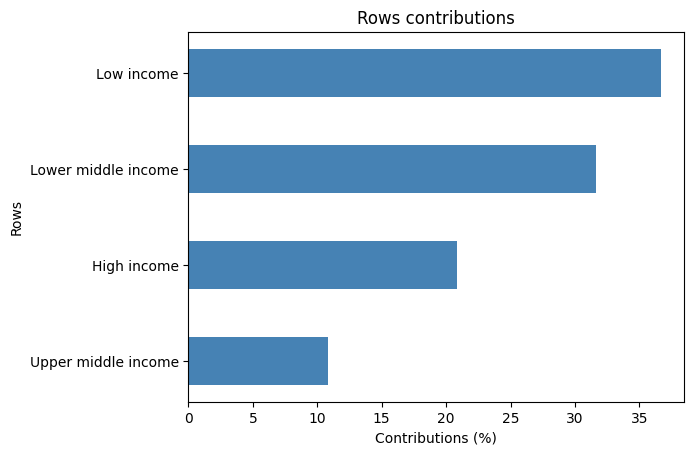

In [16]:
# Afficher la contribution des profils lignes au premier axe factoriel
print("Premier axe")  
afc.plot_row_contrib(num_axis=1)  

#### Interprétation
    Revenu Faible (Low income) : Contribution d'environ 37%. Cela signifie qu'il a été déterminant pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution d'environ 33%. Cela signifie qu'il a également joué un rôle important dans la construction de cet axe.

    Revenu Élevé (High income) : Contribution d'environ 22%. Cela signifie qu'il a eu une influence modérée sur cet axe.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution d'environ 11%. Cela signifie qu'il a joué un rôle mineur dans la construction de cet axe factoriel.

Second axe


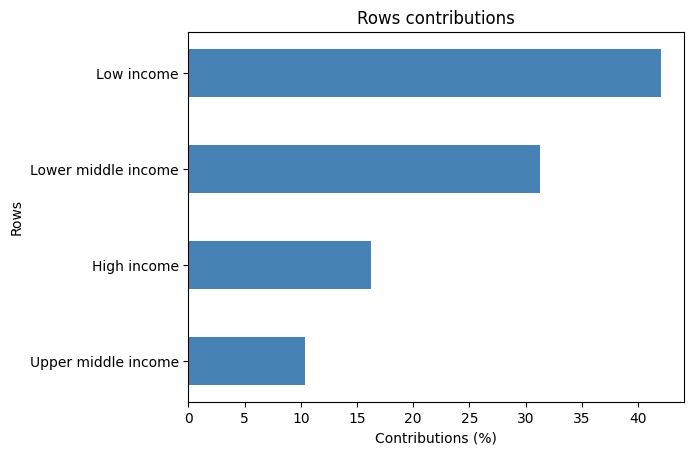

In [17]:
# Afficher la contribution des profils lignes au deuxième axe factoriel
print("Second axe")  
afc.plot_row_contrib(num_axis=2)  

#### Interprétation : 
    Revenu Faible (Low income) : Contribution la plus élevée : 42% . Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution significative (33%) mais inférieure à celle des revenus faibles. Elle a aussi joué un rôle important pour caractériser cet axe.

    Revenu Élevé (High income) : Contribution significativement plus faible que les revenus intermédiaires inférieurs (17 %) et donc a joué un rôle moins important.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution la plus faible (11 %). Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

Profils colonnes (Classification Transition Énergétique) 

Premier axe


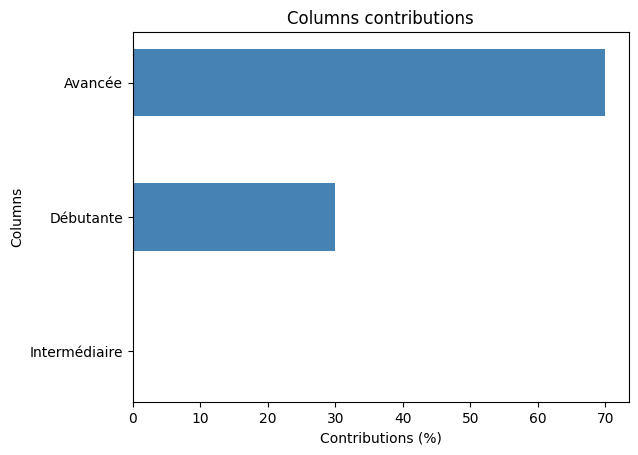

In [18]:
# Afficher la contribution des profils colonnes au premier axe factoriel
print("Premier axe")  
afc.plot_col_contrib(num_axis=1)   

#### Interprétation
    Avancée : Contribution la plus élevée (70 %). Cela signifie que cette classification a été déterminante pour caractériser cet axe.

    Débutante : Contribution significative (environ 32%), mais inférieure à celle de la classification avancée. Elle a également joué un rôle important pour caractériser cet axe.

    Intermédiaire : Contribution non visible. Cela signifie que cette classification a joué un rôle mineur ou inexistant dans la construction de cet axe factoriel.

Second axe


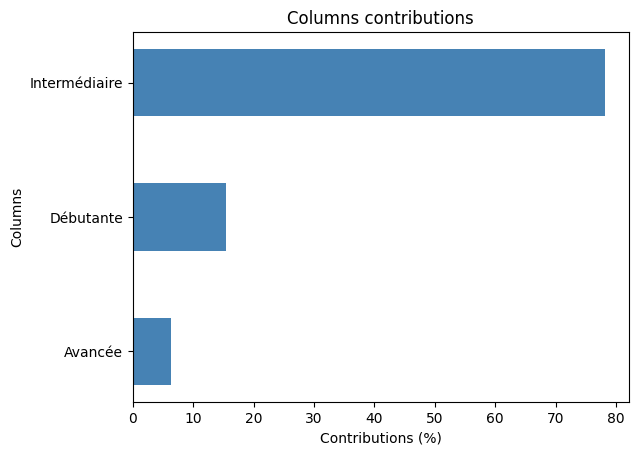

In [19]:
# Afficher la contribution des profils colonnes au deuxième axe factoriel
print("Second axe")  
afc.plot_col_contrib(num_axis=2) 

#### Interprétation

Intermédiaire : Contribution d'environ 78%. Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

Débutante : Contribution significative d'environ 17%, mais inférieure à celle de la classification intermédiaire. Elle a également joué un rôle important pour caractériser cet axe.

Avancée : Contribution plus faible, d'environ 6%. Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

### Analyse Graphique

#### Graphique superposition des profils lignes et colonnes

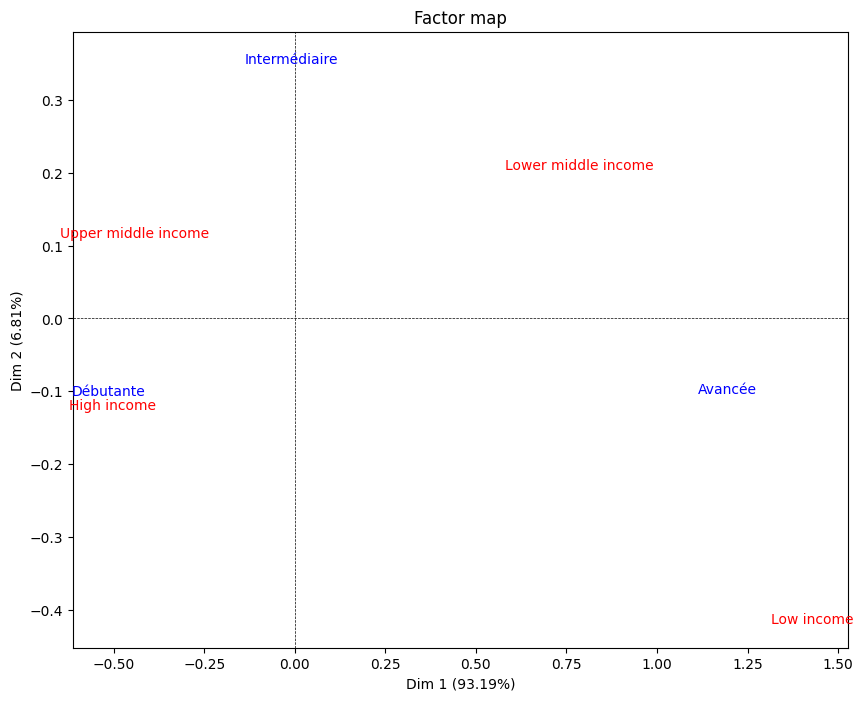

In [22]:
afc.mapping(1, 2, figsize=(10, 8))

**Dimensions et Explication de la Variance :**

   - La première dimension (Dim 1) explique 93.19% de la variance.
   - La deuxième dimension (Dim 2) explique 6.81%.
   - Ensemble, elles expliquent environ 100% de la variance, ce qui indique que ces deux dimensions capturent parfaitement bien la structure des données.
     
**Associations Clés :**

   - **High Income** : ces pays semblent associées à **Débutante** dans la partie inférieur gauche.
   - **Low Income** : Ils sont proches de **Avancée** dans la partie inférieur droite.
   - **Lower Middle Income** et **Upper Middle Income** : Ils sont situés près de **Intermédiaire**.
   - **Lower Middle Income** : ces pays sont également situés près de **Avancée**.

# Réponse à la question 1:  Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

D'après nos interprétations (produits scalaires, Cos² et axes ) :
      Oui, il existe une association significative entre les catégories de revenus et la dépendance aux énergies renouvelables. Les pays à faible revenu tendent paradoxalement à avoir des classifications avancées, tandis que les pays à revenu élevé restent souvent dans des phases débutantes.

# Réponse à la question 2: Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

D'après nos interprétations (Contributions, Cos², analyse par dimensions et analyse graphique) :
Oui, les pays avec des politiques énergétiques avancées proviennent principalement des catégories de revenus faibles ("Low Income") et intermédiaires inférieurs ("Lower Middle Income"). Les pays à faible revenu montrent une forte association positive avec la catégorie "Avancée", tandis que les pays à revenu intermédiaire inférieur présentent également une association positive avec cette catégorie.
En revanche, les pays à revenu élevé ("High Income") et intermédiaire supérieur ("Upper Middle Income") sont faiblement représentés dans cette catégorie.